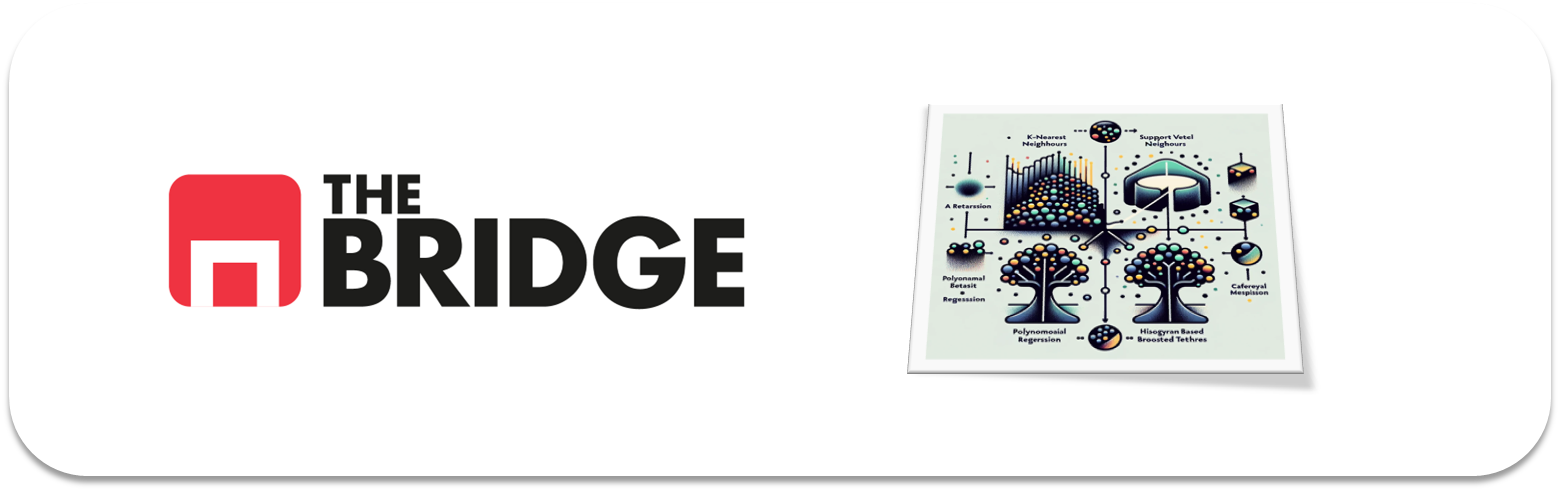

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [22]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [13]:
df= pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
target_class = "quality"
target_reg= "alcohol"

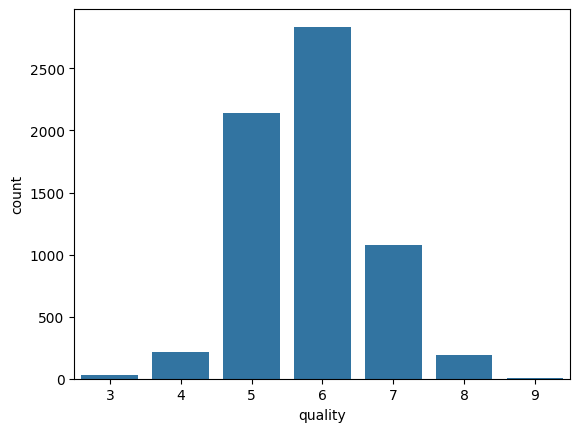

In [16]:
sns.countplot(data=df, x='quality');

-  Variable discreta, con valores de 3 y 9.
-  Distribución desequilibrada, mayor volumen de observaciones entre 5, 6 y 7.
-  A lo mejor accuracy no funciona bien por el desequilibrio, recall macro funcionara mejor.



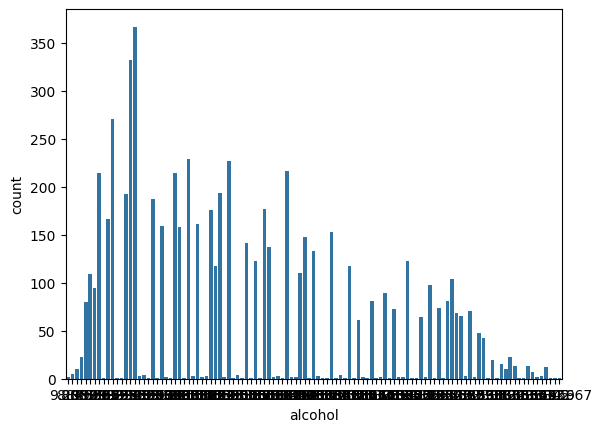

In [17]:
sns.countplot(data=df, x='alcohol');

-  Variable continua, distribución de forma aproximada normal.
-  Vendría bien usar Regreasión lineal o Random Forest.
-  Para equivocarnos lo menos posible, deberíamos usar Error porcentual medio absoluto, MAPE.

In [18]:
df.rename(columns = {'quality': 'target_class'}, inplace=True)
df.rename(columns = {'alcohol': 'target_reg'}, inplace=True)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [19]:
X = df.drop(columns=["target_class", "class", "target_reg"]) 
y = df["target_class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [20]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.225159,0.338890,0.317801,5.458187,0.055968,30.649413,116.021840,0.994732,3.217982,0.531459
std,1.305226,0.162974,0.145208,4.794210,0.033980,17.896279,56.642512,0.003006,0.159441,0.147496
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994940,3.210000,0.510000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000
max,15.900000,1.330000,1.660000,65.800000,0.467000,289.000000,440.000000,1.038980,4.010000,1.980000


In [27]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# Realizar predicciones con validación cruzada para cada modelo

y_pred_knn_cv = cross_val_predict(KNeighborsClassifier(), X_scaled, y, cv=5)

y_pred_rf_cv = cross_val_predict(RandomForestClassifier(random_state=42), X_scaled, y, cv=5)

# Reports
print(classification_report(y, y_pred_knn_cv, output_dict=False))

print(classification_report(y, y_pred_rf_cv, output_dict=False))

              precision    recall  f1-score   support

           3       0.17      0.03      0.06        30
           4       0.21      0.11      0.15       216
           5       0.56      0.61      0.58      2138
           6       0.56      0.62      0.59      2836
           7       0.52      0.42      0.47      1079
           8       0.37      0.15      0.21       193
           9       0.00      0.00      0.00         5

    accuracy                           0.55      6497
   macro avg       0.34      0.28      0.29      6497
weighted avg       0.54      0.55      0.54      6497

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        30
           4       0.78      0.13      0.23       216
           5       0.71      0.73      0.72      2138
           6       0.65      0.78      0.71      2836
           7       0.73      0.53      0.61      1079
           8       0.87      0.36      0.51       193
           9       0.00 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

El que mejor funciona ahora es Random forest, sobre todo en clases 5,6 y 7.
No predice clase 9.
KNN recall medio es 0.28, funciona ok con clases 5 y 6, pero bastante pero en 3,4,8

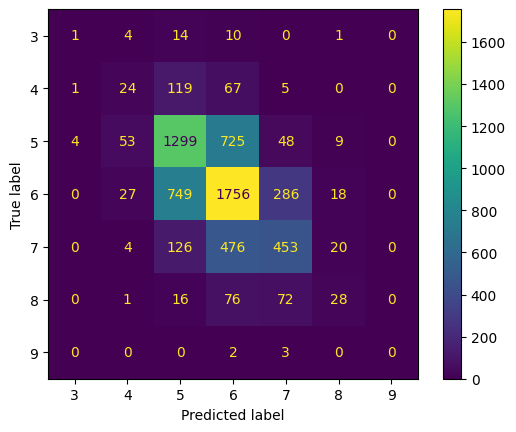

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y, y_pred_knn_cv)

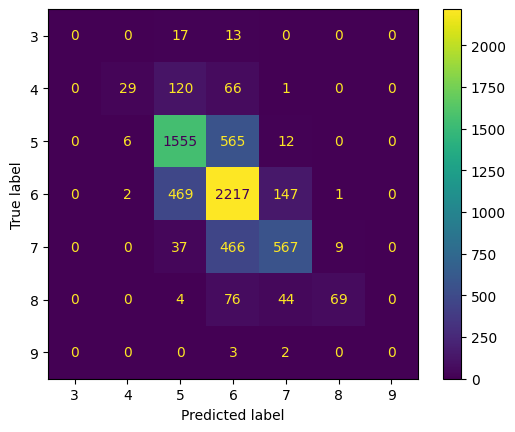

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y, y_pred_rf_cv)

Errores:
Clases minoritarias como 3, 4, 8, y 9 estan mal clasificadas o directamente no  las predice:
Clase 4 suele confundirse con 5.
Clase 8 tiende a confundirse con 7 o 6.
Clase 9 no se predice nunca.
Esto refleja un claro desequilibrio de clases, que perjudica el recall macro.

Para ayudar el desequilibrio:
SMOTE (aumentar clases minoritarias sintéticamente).
Class weights: usar class_weight="balanced" en el modelo.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [32]:
X_reg = df.drop(columns=["target_reg"])  # ahora alcohol es la variable objetivo
X_reg = pd.get_dummies(X_reg, drop_first=True)  # convertir 'class' en variable dummie
y_reg = df["target_reg"]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimizar Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

#  Evaluamos
y_pred_test = best_rf.predict(X_test_scaled)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)

r2 = r2_score(y_test, y_pred_test)

# Resultados
evaluation = {
    "MAPE (test)": mape_test,
    "MAE (test)": mae_test,
    "RMSE (test)": rmse_test,
    "R2 (test)": r2,
    "Mejores hiperparámetros": grid_search.best_params_
}

evaluation


{'MAPE (test)': 0.024830322800394777,
 'MAE (test)': 0.26225403083028104,
 'RMSE (test)': 0.16067607730454248,
 'R2 (test)': 0.8859882388694221,
 'Mejores hiperparámetros': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 200}}

Nos estamos equivocando 2.46% con Random Forest

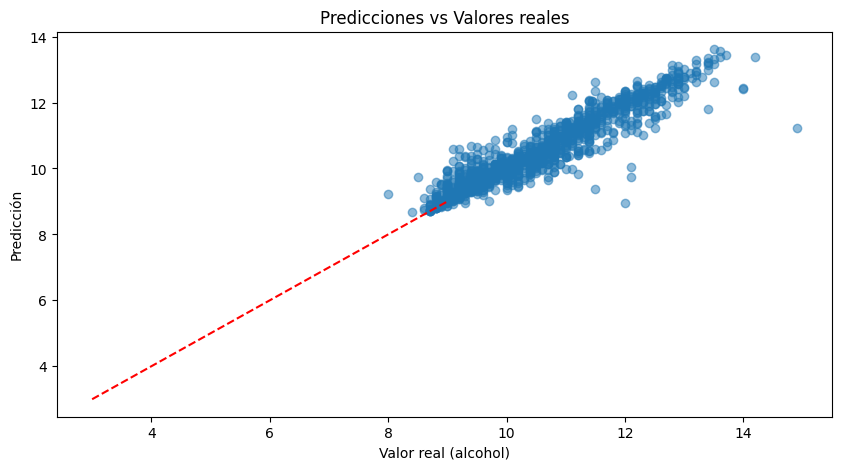

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valor real (alcohol)")
plt.ylabel("Predicción")
plt.title("Predicciones vs Valores reales")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
models_reg = {

    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# MAPE cross- validation
results_reg = {}
for name, model in models_reg.items():
    scores = -1 * cross_val_score(model, X_reg_scaled, y_reg, scoring='neg_mean_absolute_percentage_error', cv=5)
    results_reg[name] = scores

results_df_reg = pd.DataFrame(results_reg).T
results_df_reg["MAPE Medio (CV)"] = results_df_reg.mean(axis=1)
results_df_reg = results_df_reg[["MAPE Medio (CV)"]]

In [40]:
results_df_reg

,MAPE Medio (CV)
Linear Regression,0.033525
KNN Regressor,0.039884
Random Forest,0.024551


Random Forest comprado con estos modelos, me esta dando el mejor resultado.


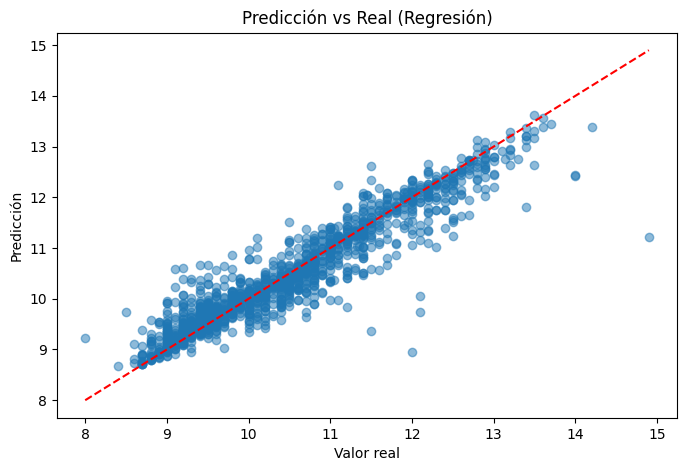

In [43]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Predicción vs Real (Regresión)")
plt.show()

In [48]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_percentage_error')

grid.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print("Mejores hiperparámetros:", grid.best_params_)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAPE: 0.024830322800394777
MAE: 0.26225403083028104
RMSE: 0.16067607730454248
R²: 0.8859882388694221


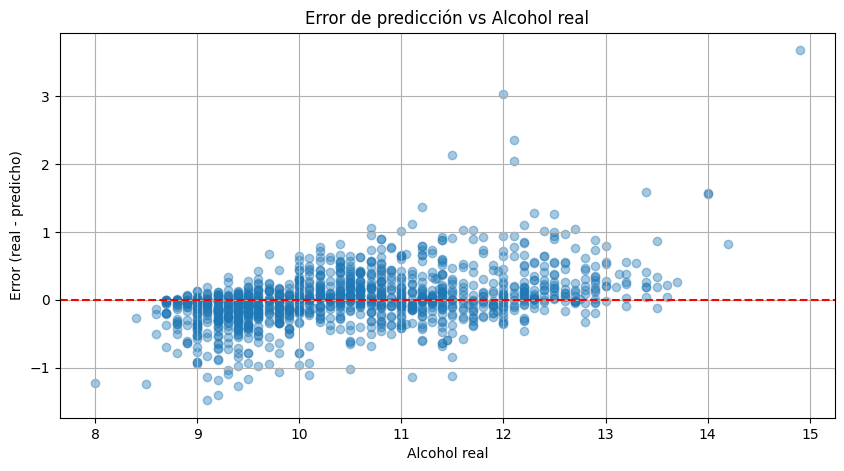

In [49]:
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_test, errors, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Error de predicción vs Alcohol real")
plt.xlabel("Alcohol real")
plt.ylabel("Error (real - predicho)")
plt.grid(True)
plt.show()

El modelo se desvía más al predecir grados alcohólicos extremos (por ejemplo, por encima de 13 o por debajo de 9).
Hay tendencia sistemática a sobrestimar o subestimar en ciertos rangos.